# Data preparation

In [1]:
# Import Modul
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Iris.csv menggunakan pandas(pd.read_csv()) dan menggunakan sep=',' untuk memisahkan header menjadi beberapa kolom menggunakan (,) sebagai indikator pemisah
data = pd.read_csv('Iris.csv', sep=',')

# membuat salinan independen dari data yang sudah ada untuk mencegah perubahan pada dataset asli ketika melakukan manipulasi atau transformasi pada salinan dataset
data = data.copy()

In [3]:
# Menghapus Kolom id karena header id tidak terlalu dibutuhkan karena hanya berisi index dan terkesan menggangu dalam mengolah data nantinya
df = df.drop('Id', axis = 1)
sorted_df = df.sort_values(by='PetalWidthCm', ascending=False)
sorted_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
100,6.3,3.3,6.0,2.5,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
114,5.8,2.8,5.1,2.4,Iris-virginica
140,6.7,3.1,5.6,2.4,Iris-virginica
...,...,...,...,...,...
13,4.3,3.0,1.1,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
# Menghitung jumlah data yang null, dengan cara menjumlahkan semua data yang dianggap null/kosong lalu dinilai = 1 dan dijumlahkan
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
# Menghitung jumlah data yang terduplikat, dengan cara menjumlahkan semua data yang dianggap kembar/sama lalu dinilai = 1 dan dijumlahkan
df.duplicated().sum()

3

In [6]:
# Menghapus data yang terduplikat
df = df.drop_duplicates()

# Mengecek apakah data yang terduplikat sudah dihapus
df.duplicated().sum()

0

# Clasification

In [7]:
# scatterplot
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']
i = 0

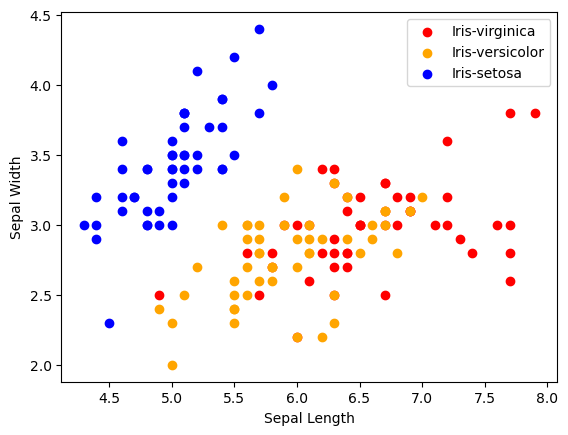

In [8]:
# Mengelompokan Species berdasarkan SepalLengthCm dan SepalWidthCm
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

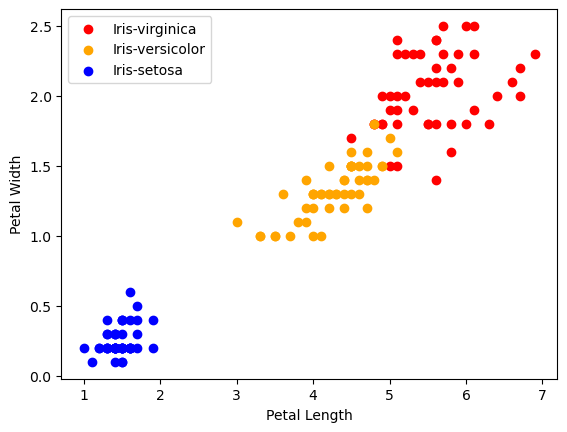

In [9]:
# Mengelompokan Species berdasarkan PetalLengthCm dan PetalWidthCm
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

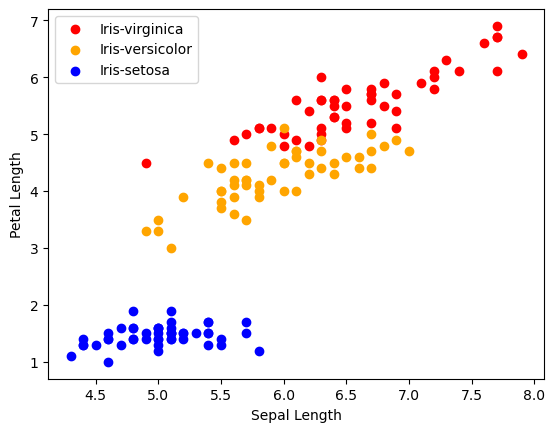

In [10]:
# Mengelompokan Species berdasarkan SepalLengthCm dan PetalLengthCm
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

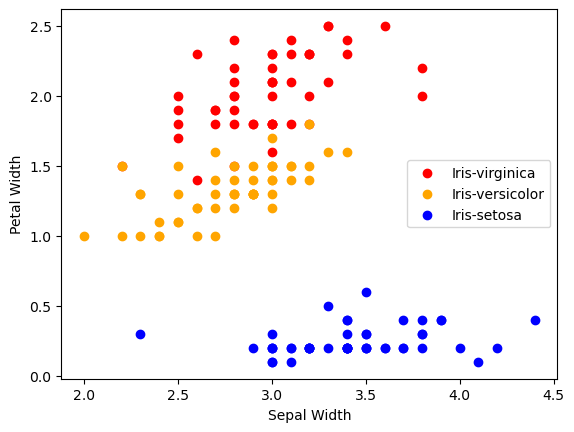

In [11]:
# Mengelompokan Species berdasarkan SepalWidthCm dan PetalWidthCm
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

In [12]:
# One-hot encode the 'Species' column
df_encoded = pd.get_dummies(df, columns=['Species'])

# Ambil kolom-kolom numerik (tanpa 'Species')
numerical_columns = df_encoded.select_dtypes(include=['float64', 'int64']).columns

# Hitung korelasi hanya untuk kolom-kolom numerik
correlation_matrix = df_encoded[numerical_columns].corr()
correlation_matrix

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000


<Axes: >

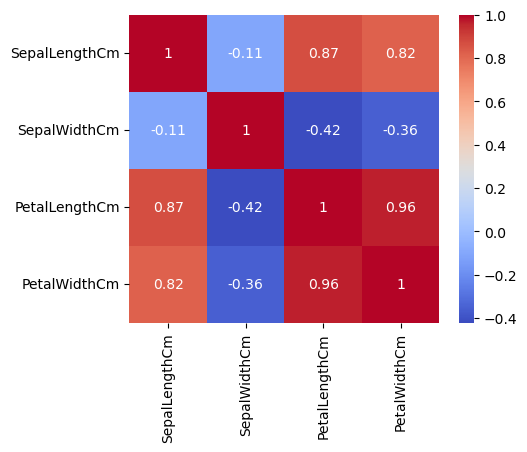

In [13]:
corr = correlation_matrix
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
# ubah kolom Species menjadi nilai numerik
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Add this import
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# train - 70
# test - 30
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)


In [17]:
# X berisi data 4 kolom sepal w,l dan petal w,l
print("X_train :",x_train.shape)
print("X_test :",x_test.shape)

# y hanya berisi spesies
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

X_train : (102, 4)
X_test : (45, 4)
y_train : (102,)
y_test : (45,)


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [19]:
knn.predict(x_test)

array([1, 2, 0, 1, 2, 2, 0, 1, 1, 0, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1,
       2, 1, 0, 2, 1, 1, 0, 1, 2, 0, 0, 1, 2, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0])

In [20]:
predictions = knn.predict(x_test)

In [21]:
print("Acuracy Score   :", accuracy_score(y_test, predictions))
print("precision Score :", precision_score(y_test, predictions, average = "weighted"))
print("recall Score    :", recall_score(y_test, predictions, average = "weighted"))
print("f1 Score        :", f1_score(y_test, predictions, average = "weighted"))

Acuracy Score   : 0.8888888888888888
precision Score : 0.8964590964590965
recall Score    : 0.8888888888888888
f1 Score        : 0.8874152667256116


In [22]:
# Evaluasi performa model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

# # Menampilkan hasil evaluasi
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.8888888888888888

Confusion Matrix:
 [[11  0  0]
 [ 0 17  1]
 [ 0  4 12]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.81      0.94      0.87        18
           2       0.92      0.75      0.83        16

    accuracy                           0.89        45
   macro avg       0.91      0.90      0.90        45
weighted avg       0.90      0.89      0.89        45



In [23]:
# # Membuat model klasifikasi (contoh: Random Forest Classifier)
# clf = RandomForestClassifier(n_estimators=2)

# # Melatih model pada set pelatihan
# clf.fit(x_train, y_train)

# # Melakukan prediksi pada set pengujian
# y_pred = clf.predict(x_test)

# # Evaluasi performa model
# accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)
# classification_rep = classification_report(y_test, y_pred)

# # Menampilkan hasil evaluasi
# print("Accuracy:", accuracy)
# print("\nConfusion Matrix:\n", conf_matrix)
# print("\nClassification Report:\n", classification_rep)

Accuracy: 0.9111111111111111

Confusion Matrix:
 [[11  0  0]
 [ 0 17  1]
 [ 0  3 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.85      0.94      0.89        18
           2       0.93      0.81      0.87        16

    accuracy                           0.91        45
   macro avg       0.93      0.92      0.92        45
weighted avg       0.91      0.91      0.91        45



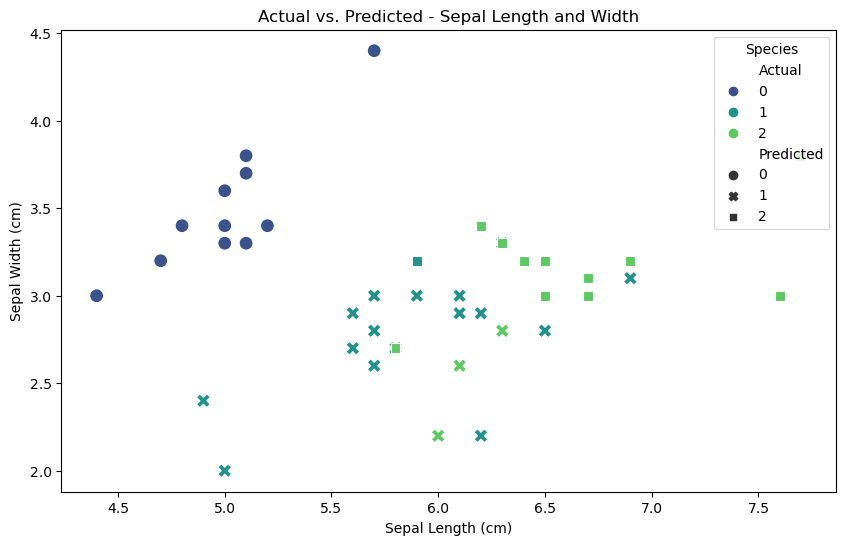

In [24]:
# # Assuming y_test is the actual labels and y_pred is the predicted labels
# result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# # Convert 'Actual' and 'Predicted' columns to categorical for proper plotting
# result_df['Actual'] = result_df['Actual'].astype('category')
# result_df['Predicted'] = result_df['Predicted'].astype('category')

# # Scatter plot for Sepal Length and Width
# plt.figure(figsize=(10, 6))

# sns.scatterplot(x=df['SepalLengthCm'], y=df['SepalWidthCm'], hue=result_df['Actual'], style=result_df['Predicted'], palette='viridis', s=100)

# plt.title('Actual vs. Predicted - Sepal Length and Width')
# plt.xlabel('Sepal Length (cm)')
# plt.ylabel('Sepal Width (cm)')
# plt.legend(title='Species', loc='upper right')
# plt.show()